In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import * 
from rates import *


In [2]:
data = np.load('./products/iin.npz', allow_pickle=True)
redshifts = data['redshifts']
metric_tracker = data['metric_tracker']
metric_list = data['metric_list']


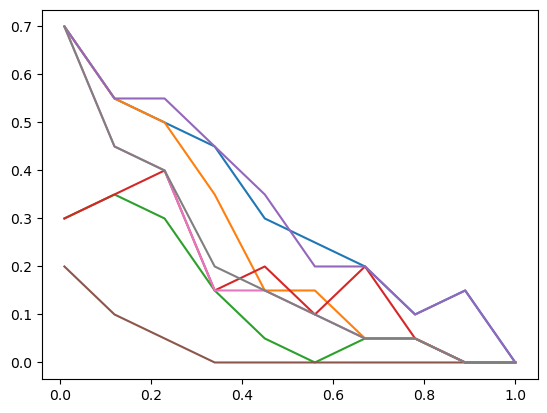

In [3]:
efficiencies = calc_efficiences(metric_tracker)
plt.plot(redshifts, efficiencies)
plt.show()

[414585.90276024 173403.66782503  83018.09989665 203930.2027424
 411096.76978439   2648.90062007 135085.57981702 139897.84467215] 1 / rad2


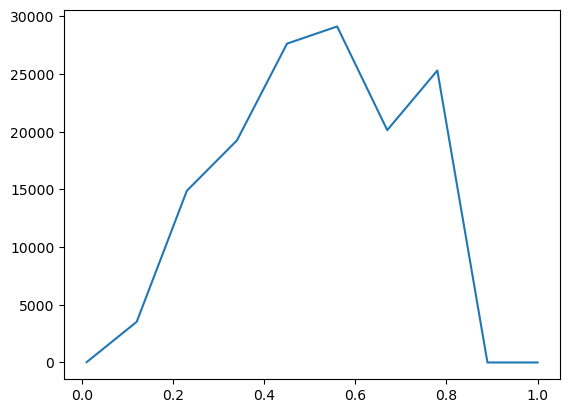

In [4]:
def rate_strolger(z):
	"""
	From https://iopscience.iop.org/article/10.1088/0004-637X/813/2/93/pdf
	Eqn 9
	"""
	A = 0.015
	B = 1.5
	C = 5.0 
	D = 6.1
	k = 0.006
	rate = 1e9 * k * A * (1 + z)**C / (((1 + z)/B)**D + 1)
	return rate

# that 0.04 is the percent from the CCSN population
integrand, total_rate = calc_rate(redshifts, efficiencies, rate_strolger, rate_z0=0.04)

dz = redshifts[1] - redshifts[0];
plt.plot(redshifts, dz * integrand.value[:,-1] * 1e-9)
print(total_rate)